In [1]:
# from sympy import (symbols, exp, Ynm, Abs, I, pi, cos, sin, sqrt,
#                    cancel, expand_func, legendre, solve, re, simplify, expand,
#                    init_printing, pprint, latex)
%matplotlib notebook
from sympy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import *
from scipy import special
I = 0 + 1j



init_printing()

fname1 = 'Amplitude_sheet.csv'
fname2 = 'Phase_difference_sheet.csv'
fname3 = '../wang.txt'
C_val = pd.read_csv(fname1, sep=',', index_col=0)
Phase_val = pd.read_csv(fname2, sep=',', index_col=0)
wdata = pd.read_csv(fname3, comment="#", delim_whitespace=True, header=None, skiprows=1)

print(C_val)
print(Phase_val)
weight = wang = wdata.iloc[:, 2]
cos_ang = xang = wdata.iloc[:, 0]

phi, the, vphi = symbols('phi theta varphi', real=True)
# eta_p, eta_f, eta_s, eta_d = symbols('eta_p eta_f eta_s eta_d', real=True,
# )
# c_psp, c_pdp, c_fdp, c_sp, c_dp = symbols(
#     'c_psp c_pdp c_fdp c_sp c_dp',
#     positive=True,
# )

           l = 0     l = 1     l = 2     l = 3
m = -1       NaN  0.030177  0.025369  0.039723
m = 0   0.019175  0.037664  0.029017  0.048385
m = 1        NaN  0.030177  0.025369  0.039723
           l = 0     l = 1  l = 2     l = 3
m = -1       NaN -2.329838    0.0  1.161638
m = 0   2.338519 -2.153382    0.0  1.162043
m = 1        NaN -2.329838    0.0  1.161638


In [2]:
def Ylm(l, m):
    assoc_leg = special.lpmv(np.abs(m), l, cos_ang)
    fac = np.sqrt( (2.0*l+1.0) / 2.0 * np.math.factorial(l -  np.abs(m)) / np.math.factorial(l +  np.abs(m)))
    sph_val = fac * assoc_leg
    return  sph_val          

In [3]:
# c0sp = -sqrt(3)/3*c_sp
# c0dp, c1dp = sqrt(6)/3*c_dp, sqrt(2)/2*c_dp
# c0psp = -sqrt(3)/3*c_psp
# c0pdp, c1pdp = -2*sqrt(15)/15*c_pdp, -sqrt(15)/10*c_pdp
# c0fdp, c1fdp = sqrt(10)/5*c_fdp, 2*sqrt(15)/15*c_fdp
c0sp = C_val['l = 0']['m = 0']
c0dp, c1dp = C_val['l = 2']['m = 0'], C_val['l = 2']['m = 1']
c0pp, c1pp = C_val['l = 1']['m = 0'], C_val['l = 1']['m = 1']
c0fdp, c1fdp = C_val['l = 3']['m = 0'], C_val['l = 3']['m = 1']

eta_s = Phase_val['l = 0']['m = 0']
eta_p = Phase_val['l = 1']['m = 0']
eta_p1 = Phase_val['l = 1']['m = 1']
eta_d = Phase_val['l = 2']['m = 0']
eta_f = Phase_val['l = 3']['m = 0']
eta_f1 = Phase_val['l = 3']['m = 1']
# waves_m = {
#     -1: (c1pp * exp(eta_p1 * I) * Ynm(1, -1, the, vphi) +
#          c1fdp * exp(eta_f1 * I) * Ynm(3, -1, the, vphi) +
#          c1dp * exp(eta_d * I + phi * I) * Ynm(2, -1, the, vphi)),
#     0: (c0pp * exp(eta_p * I) * Ynm(1, 0, the, vphi) +
#         c0fdp * exp(eta_f * I) * Ynm(3, 0, the, vphi) +
#         c0sp * exp(eta_s * I + phi * I) * Ynm(0, 0, the, vphi) +
#         c0dp * exp(eta_d * I + phi * I) * Ynm(2, 0, the, vphi)),
#     1: (c1pp * exp(eta_p1 * I) * Ynm(1, 1, the, vphi) +
#         c1fdp * exp(eta_f1 * I) * Ynm(3, 1, the, vphi) +
#         c1dp * exp(eta_d * I + phi * I) * Ynm(2, 1, the, vphi)),
# }
phi=0
waves_m = {
    -1: (c1pp * np.exp(eta_p1 * I) * Ylm(1, -1) +
         c1fdp * np.exp(eta_f1 * I) * Ylm(3, -1) +
         c1dp * np.exp(eta_d * I + phi * I) * Ylm(2, -1)),
    0: (c0pp * np.exp(eta_p * I) * Ylm(1, 0) +
        c0fdp * np.exp(eta_f * I) * Ylm(3, 0) +
        c0sp * np.exp(eta_s * I + phi * I) * Ylm(0, 0) +
        c0dp * np.exp(eta_d * I + phi * I) * Ylm(2, 0)),
    1: (c1pp * np.exp(eta_p1 * I) * Ylm(1, 1) +
        c1fdp * np.exp(eta_f1 * I) * Ylm(3, 1) +
        c1dp * np.exp(eta_d * I + phi * I) * Ylm(2, 1)),
}


In [4]:
# yield1= yield_lft.subs({the:pi/4, phi:0})

# Int = []
# for ang in xang:
#     Int.append(N(np.abs(yield_lft.subs({cos(the):ang, phi:0}))))

# np.abs(np.array(waves_m[-1]))
I_cval=(np.abs(waves_m[-1]) ** 2 + np.abs(waves_m[0]) ** 2 + np.abs(waves_m[1]) ** 2)

In [5]:
krad = 0
def Beta_onek(fname):
    data = pd.read_csv(fname, comment="#", delim_whitespace=True, header=None, skiprows=3)
    with open(fname, "r") as fp:
        fp.readline()
        num_krad = int(fp.readline().strip("\n"))
        num_kang = int(fp.readline().strip("\n"))

    global krad
    krad = data.iloc[:,0]
    kang = data.iloc[:,1]
    kval = data.iloc[:,2]
    
    krad = krad.values.reshape([num_krad,num_kang])
    kang = kang.values.reshape([num_krad, num_kang])
    kval = kval.values.reshape([num_krad, num_kang])
    
    orbital_2s = 0
    momentum = krad[:,0]

    num_krad_half = int(num_krad/2)
    num_kang_half = int(num_kang/2)
    dk = np.zeros((num_krad), dtype = 'float')
    for i in range(0,num_krad):
        if(i < num_krad):
            dk[i] = momentum[i] - momentum[i-1]   
        if(i == 0) :
            dk[i] = momentum[i] - 0.0
    i = 69
    def Legendre0():
   
        all = 0
        for j in range(0, num_kang):
            all +=   kval[i, j]  * weight[j] * eval_legendre(0, cos_ang[j])
        return  all / 2
    def Legendre1():
        all = 0

        for j in range(0, num_kang):
            all +=   kval[i, j] * weight[j] * eval_legendre(1, cos_ang[j])

        return  all * 3/2

    def Legendre2():

        all = 0

        for j in range(0, num_kang):
            all +=   kval[i, j]  * weight[j] * eval_legendre(2, cos_ang[j])

        return  all * 5/2

    def Legendre3():
        all = 0

        for j in range(0, num_kang):
            all +=   kval[i, j] * weight[j] * eval_legendre(3, cos_ang[j])

        return all * 7/2

    def Legendre4():

        all = 0

        for j in range(0, num_kang):
            all +=   kval[i, j]  * weight[j] * eval_legendre(4, cos_ang[j])

        return all * 9/2

    beta0 = Legendre0()
    beta1 = Legendre1()/beta0
    beta2 = Legendre2()/beta0
    beta3 = Legendre3()/beta0
    beta4 = Legendre4()/beta0
    beta = [beta1, beta2, beta3, beta4]
    
#     beta = pd.DataFrame([[beta1, beta2, beta3, beta4]], columns = ['beta1','beta2', 'beta3', 'beta4'])
    return   beta

   

<IPython.core.display.Javascript object>


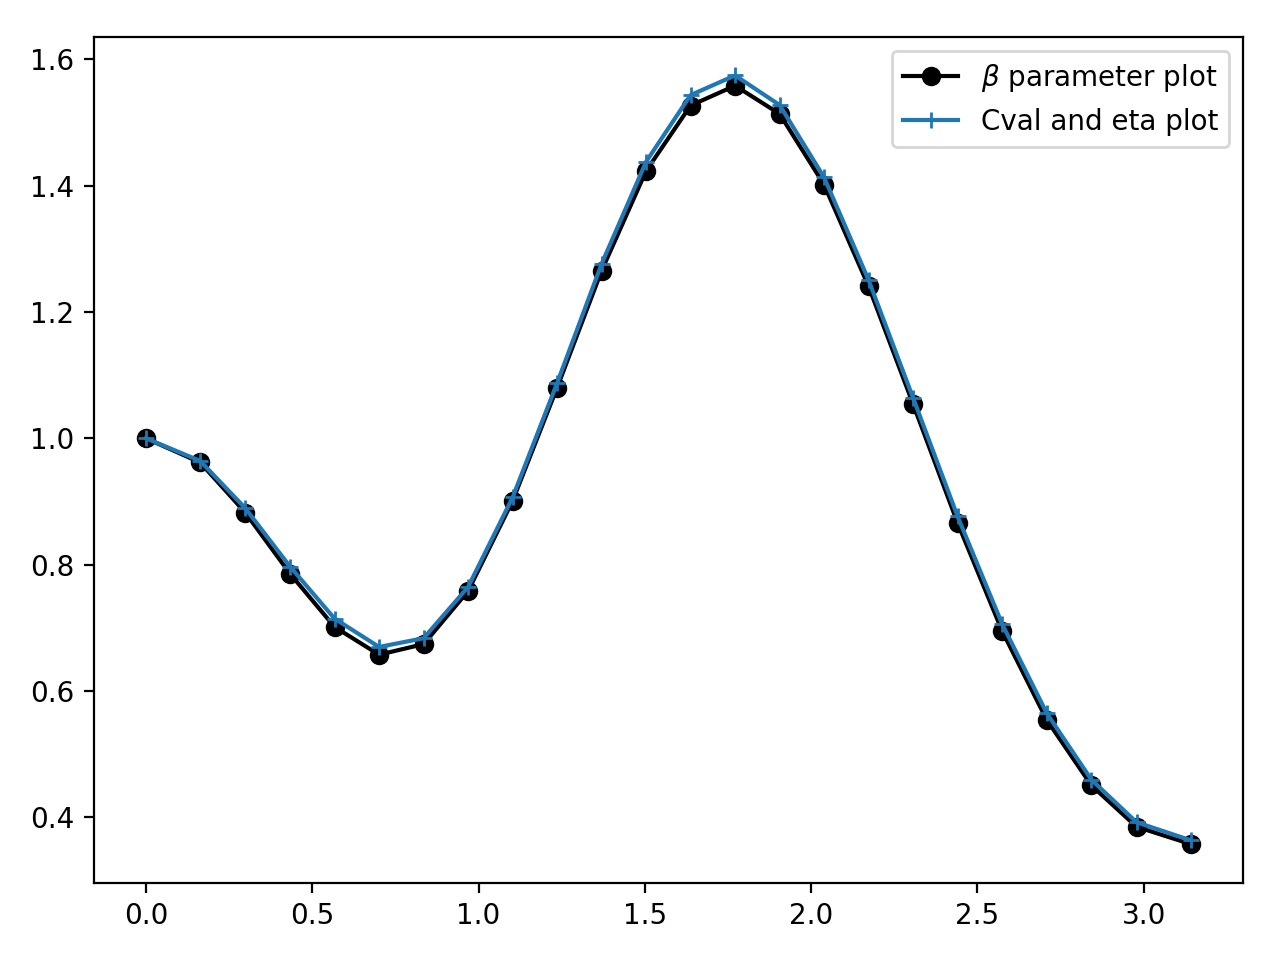

In [6]:
fname = 'Ne.00.00.00.05.SPECTRUM/Ne.00.00.00.05_00000030.ang_spec'
I = np.zeros(24)
beta1=Beta_onek(fname)
for j in range(24):
    I[j] = 1 + beta1[0] * eval_legendre(1, cos_ang[j]) + beta1[1] *eval_legendre(2, cos_ang[j])+ beta1[2] * eval_legendre(3, cos_ang[j])+ beta1[3]* eval_legendre(4, cos_ang[j])

fig, ax1=plt.subplots()
ax1.plot(wdata.iloc[:, 1], I/I[23], "ko-", label=r"$\beta$ parameter plot")
ax1.plot(wdata.iloc[:, 1], I_cval/I_cval[23], "+-", label= "Cval and eta plot")

# ax1.set_ylabel('Beta parameter of 7.00 eV plot')
ax1.tick_params(axis='y',labelcolor = 'black' )
ax1.legend(loc='upper right')



# ax1.set_ylim(0, 1.5)
# ax1.legend(('Beta'), loc='upper right')



# ax2 = ax1.twinx()
# ax2.set_ylabel('Cval and eta plot', color ='steelblue')
# ax2.tick_params(axis='y',labelcolor = 'steelblue')
fig.tight_layout()
plt.savefig("14.3eV.png", dpi=300)
plt.show()

<IPython.core.display.Javascript object>


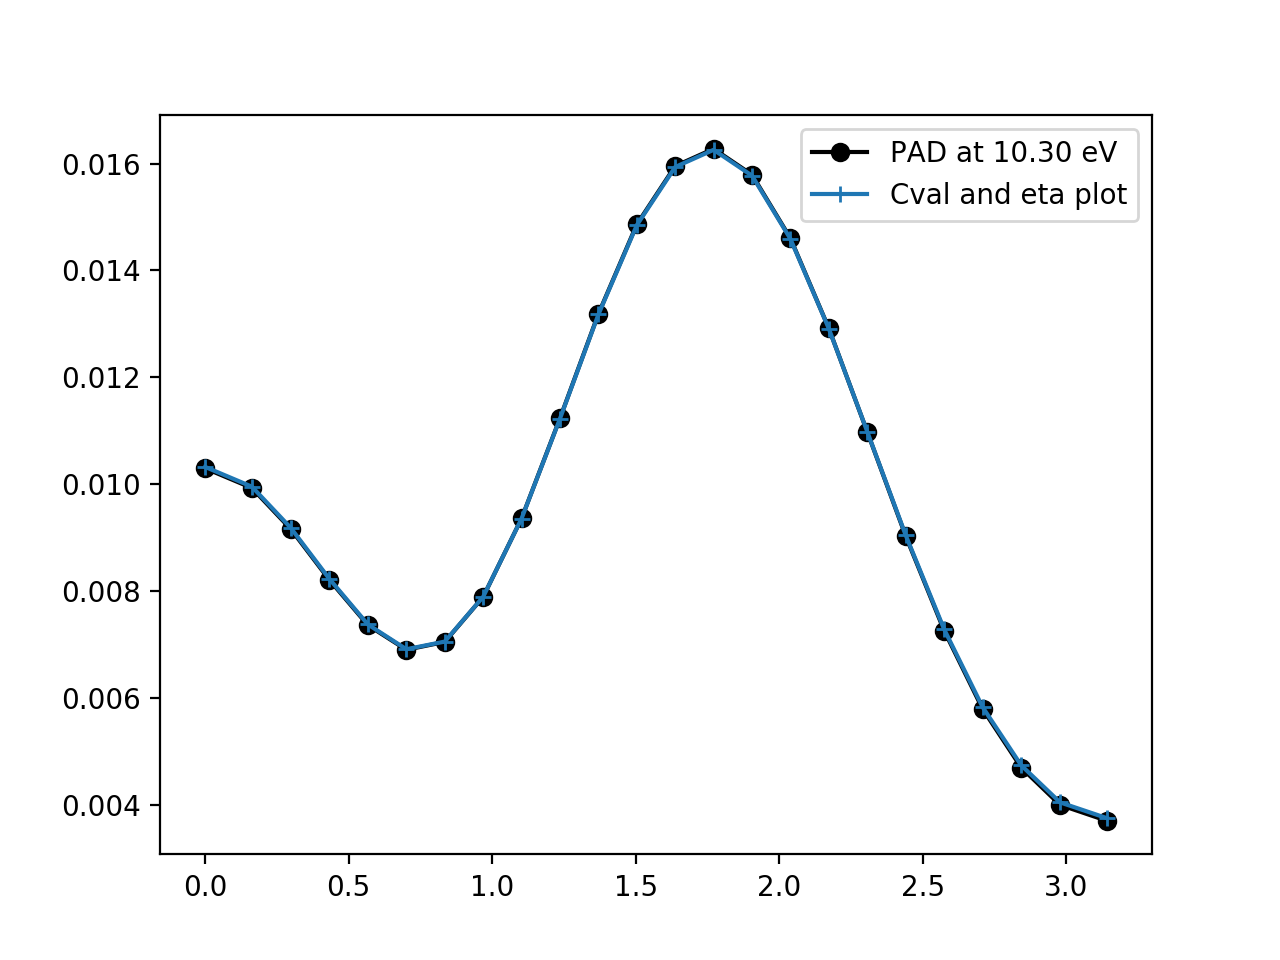

In [7]:
fname = 'Ne.00.00.00.05.SPECTRUM/Ne.00.00.00.05_00000030.ang_spec'

pi = np.pi

with open(fname, "r") as fp:
    fp.readline()
    num_krad = int(fp.readline().strip("\n"))
    num_kang = int(fp.readline().strip("\n"))

data = pd.read_csv(fname, comment="#", delim_whitespace=True, header=None, skiprows=3)
wang_data = pd.read_csv("../wang.txt", comment="#", delim_whitespace=True, header=None, skiprows=1)


kval = data.iloc[:,2]

kang_rad = wang_data.iloc[:,1]
kval = kval.values.reshape([num_krad, num_kang])

# for i in range(0, num_krad_half):
#     for j in range(0, num_kang):
#         I2[j] += kval[i, j]

I2 = kval[69, :]
# plt.figure()
# plt.plot(kang_rad, I2,'.-')
# plt.xlabel('kang_degree')
# plt.show()

fig, ax1=plt.subplots()

ax1.plot(wdata.iloc[:, 1], I2, "ko-", label='PAD at 10.30 eV')
# ax1.legend(('Beta'), loc='upper right')

ax1.plot(wdata.iloc[:, 1], 2 * np.array(I_cval), "+-", label='Cval and eta plot')
ax1.legend(loc='upper right')



plt.savefig("14.3eV_2.png", dpi=300)
plt.show()